### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import io

%matplotlib inline

### Step 1: Gathering Data

This data set includes info about individual rides made in GoBike bike-sharing system.



## getting jan ,Feb  2020 Baywhells-data zip file

In [2]:
#download the file

r = requests.get('https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip')
zip_f = zipfile.ZipFile(io.BytesIO(r.content))
csvf = zip_f.open('202001-baywheels-tripdata.csv')
df = pd.read_csv(csvf)
df.head()


/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [3]:
#feb
r = requests.get('https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip')
zip_f = zipfile.ZipFile(io.BytesIO(r.content))
csvf = zip_f.open('202002-baywheels-tripdata.csv')


In [4]:
df1 = pd.read_csv(csvf)
df1.head()

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


### Step 2: Assessing Data

**Assess data for:**


Quality: issues with content. Low quality data is also known as dirty data.
 
Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data 

### Quality

- missing records

- outlier in data of Jan


### Tidiness

- missing min column in duration

- all datasets should be 1 dataset.

- some column that we don't need (ex:start_station_latitude, start_station_longitude,end_station_name.. )

- no day column ( weekday, weekend )


#### Data of Jan

In [5]:
df.shape

(295854, 14)

In [6]:
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
29719,427,2020-01-23 18:23:23.9000,2020-01-23 18:30:31.6420,182.0,19th Street BART Station,37.809369,-122.267951,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,3058,Customer,NaN
115703,770,2020-01-19 15:22:34,2020-01-19 15:35:25,NaN,NaN,37.330229,-121.886062,NaN,NaN,37.350177,-121.896597,375099,Subscriber,app
187146,2969,2020-01-09 08:28:35,2020-01-09 09:18:05,NaN,NaN,37.772751,-122.467958,NaN,NaN,37.776224,-122.511880,402406,Subscriber,app
8357,158,2020-01-30 07:52:25.3890,2020-01-30 07:55:03.8050,53.0,Grove St at Divisadero,37.775946,-122.437777,71.0,Broderick St at Oak St,37.773063,-122.439078,541,Customer,NaN
11549,780,2020-01-29 09:45:34.4860,2020-01-29 09:58:35.3930,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,1533,Customer,NaN
279198,784,2020-01-23 08:27:16,2020-01-23 08:40:21,NaN,NaN,37.796079,-122.436343,NaN,NaN,37.790584,-122.405072,682603,Customer,app
257280,1551,2020-01-23 16:51:48,2020-01-23 17:17:39,NaN,NaN,37.789453,-122.390533,NaN,NaN,37.778560,-122.433456,938394,Subscriber,app
168038,175,2020-01-08 10:16:36,2020-01-08 10:19:32,104.0,4th St at 16th St,37.767045,-122.390833,126.0,Esprit Park,37.761634,-122.390648,944100,Subscriber,app
164304,137,2020-01-27 20:02:16,2020-01-27 20:04:34,96.0,Dolores St at 15th St,37.766210,-122.426614,107.0,17th St at Dolores St,37.763015,-122.426497,997659,Subscriber,app
203450,214,2020-01-19 13:30:50,2020-01-19 13:34:25,NaN,NaN,37.776523,-122.393705,NaN,NaN,37.777951,-122.400560,784953,Subscriber,clipper


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             295854 non-null  int64  
 1   start_time               295854 non-null  object 
 2   end_time                 295854 non-null  object 
 3   start_station_id         146286 non-null  float64
 4   start_station_name       146866 non-null  object 
 5   start_station_latitude   295854 non-null  float64
 6   start_station_longitude  295854 non-null  float64
 7   end_station_id           145934 non-null  float64
 8   end_station_name         146511 non-null  object 
 9   end_station_latitude     295854 non-null  float64
 10  end_station_longitude    295854 non-null  float64
 11  bike_id                  295854 non-null  int64  
 12  user_type                295854 non-null  object 
 13  rental_access_method     185746 non-null  object 
dtypes: f

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513846,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


In [9]:
#to check number of the min of the duration ( 60 )
df[df.duration_sec == 60].count()

duration_sec               54
start_time                 54
end_time                   54
start_station_id           12
start_station_name         12
start_station_latitude     54
start_station_longitude    54
end_station_id             10
end_station_name           11
end_station_latitude       54
end_station_longitude      54
bike_id                    54
user_type                  54
rental_access_method       54
dtype: int64

In [10]:
#most max duration sec

df[df.duration_sec > 81000 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
219,85011,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,37.786553,-122.399607,74.0,Laguna St at Hayes St,37.776435,-122.426244,2911,Customer,NaN
10193,84254,2020-01-28 17:57:00.2900,2020-01-29 17:21:14.3520,182.0,19th Street BART Station,37.809369,-122.267951,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3644,Customer,NaN
27024,85450,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,13072,Subscriber,NaN
43624,82523,2020-01-18 13:31:23.8140,2020-01-19 12:26:47.3910,196.0,Grand Ave at Perkins St,37.808894,-122.256460,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12548,Customer,NaN
46316,81429,2020-01-17 06:45:24.2710,2020-01-18 05:22:33.9200,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,92.0,Mission Bay Kids Park,37.772301,-122.393028,11747,Subscriber,NaN
49926,86221,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,37.326011,-121.912327,417.0,Park Ave at Race St,37.326011,-121.912327,10424,Customer,NaN
50984,85268,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,37.872355,-122.266447,210.0,45th St at Manila,37.833294,-122.256224,1930,Customer,NaN
56577,82073,2020-01-14 08:57:41.8670,2020-01-15 07:45:35.1760,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,12695,Customer,NaN
63677,85994,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,11107,Customer,NaN


In [11]:
#number of the users 
df.user_type.value_counts()

Subscriber    170988
Customer      124866
Name: user_type, dtype: int64

In [12]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

#### Data of Feb

In [13]:
df1

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432349,2321,2020-02-27 17:29:40,2020-02-27 18:08:22,NaN,NaN,37.810553,-122.476472,NaN,NaN,37.789625,-122.459580,157125,Subscriber,app
432350,1526,2020-02-01 18:01:12,2020-02-01 18:26:39,NaN,NaN,37.810568,-122.410974,NaN,NaN,37.807980,-122.414038,648380,Customer,app
432351,2596,2020-02-04 15:39:49,2020-02-04 16:23:06,NaN,NaN,37.810572,-122.476453,NaN,NaN,37.806278,-122.422227,438416,Subscriber,app
432352,3072,2020-02-25 20:22:22,2020-02-25 21:13:34,NaN,NaN,37.810688,-122.410335,NaN,NaN,37.807886,-122.418122,926639,Customer,app


In [14]:
df1.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
347811,496,2020-02-13 11:42:19,2020-02-13 11:50:36,NaN,NaN,37.787492,-122.403994,NaN,NaN,37.776659,-122.395326,328832,Subscriber,clipper
76220,456,2020-02-11 18:07:15.2970,2020-02-11 18:14:51.3920,386.0,24th St at Bartlett St,37.752105,-122.419724,145.0,29th St at Church St,37.743684,-122.426806,99,Customer,NaN
40910,563,2020-02-20 17:55:34.6440,2020-02-20 18:04:57.6570,195.0,Bay Pl at Vernon St,37.812314,-122.260779,337.0,Webster St at 19th St,37.806970,-122.266588,1163,Customer,NaN
128712,421,2020-02-05 17:50:32,2020-02-05 17:57:33,310.0,San Fernando St at 4th St,37.335885,-121.885660,NaN,NaN,37.335623,-121.894493,316535,Subscriber,clipper
236465,2341,2020-02-10 03:40:02,2020-02-10 04:19:03,NaN,NaN,37.771449,-122.510878,NaN,NaN,37.771455,-122.510827,568255,Subscriber,clipper
97662,297,2020-02-06 07:58:33.6740,2020-02-06 08:03:30.9850,372.0,Madison St at 17th St,37.804037,-122.262409,163.0,Lake Merritt BART Station,37.797320,-122.265320,2321,Customer,NaN
321945,294,2020-02-14 09:10:03,2020-02-14 09:14:58,NaN,NaN,37.783808,-122.408025,NaN,NaN,37.789871,-122.403882,113823,Subscriber,app
285155,383,2020-02-13 18:44:18,2020-02-13 18:50:42,NaN,NaN,37.777323,-122.463855,NaN,NaN,37.781193,-122.477245,546918,Customer,app
379516,469,2020-02-10 17:10:33,2020-02-10 17:18:23,NaN,NaN,37.791942,-122.394272,NaN,NaN,37.778642,-122.391157,477954,Subscriber,app
48018,231,2020-02-19 08:48:57.4270,2020-02-19 08:52:49.1640,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,47.0,4th St at Harrison St,37.780955,-122.399749,11857,Customer,NaN


In [15]:
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,432354.000000,161723.000000,432354.000000,432354.000000,162194.000000,432354.000000,432354.000000,432354.000000
mean,802.375502,174.885601,37.752000,-122.363239,167.831301,37.751563,-122.361263,366898.004772
std,1383.128099,144.087616,0.249644,0.733128,143.653096,0.286521,0.863248,300819.897178
min,60.000000,3.000000,0.000000,-122.514230,3.000000,0.000000,-122.575763,12.000000
25%,369.000000,56.000000,37.765910,-122.421264,44.000000,37.766130,-122.420628,12842.000000
50%,596.000000,126.000000,37.777288,-122.405528,120.000000,37.777429,-122.404904,355212.000000
75%,934.750000,268.000000,37.790102,-122.393572,258.000000,37.790352,-122.393547,567705.000000
max,86317.000000,512.000000,37.880222,0.000000,512.000000,37.880222,0.000000,999960.000000


In [16]:
df1[df1.duration_sec == 60].count()

duration_sec               100
start_time                 100
end_time                   100
start_station_id            16
start_station_name          16
start_station_latitude     100
start_station_longitude    100
end_station_id              14
end_station_name            14
end_station_latitude       100
end_station_longitude      100
bike_id                    100
user_type                  100
rental_access_method       100
dtype: int64

In [17]:
#most max duration sec

df[df.duration_sec > 81000 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
219,85011,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,37.786553,-122.399607,74.0,Laguna St at Hayes St,37.776435,-122.426244,2911,Customer,NaN
10193,84254,2020-01-28 17:57:00.2900,2020-01-29 17:21:14.3520,182.0,19th Street BART Station,37.809369,-122.267951,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3644,Customer,NaN
27024,85450,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,37.795001,-122.399970,11.0,Davis St at Jackson St,37.797280,-122.398436,13072,Subscriber,NaN
43624,82523,2020-01-18 13:31:23.8140,2020-01-19 12:26:47.3910,196.0,Grand Ave at Perkins St,37.808894,-122.256460,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12548,Customer,NaN
46316,81429,2020-01-17 06:45:24.2710,2020-01-18 05:22:33.9200,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,92.0,Mission Bay Kids Park,37.772301,-122.393028,11747,Subscriber,NaN
49926,86221,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,37.326011,-121.912327,417.0,Park Ave at Race St,37.326011,-121.912327,10424,Customer,NaN
50984,85268,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,37.872355,-122.266447,210.0,45th St at Manila,37.833294,-122.256224,1930,Customer,NaN
56577,82073,2020-01-14 08:57:41.8670,2020-01-15 07:45:35.1760,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,12695,Customer,NaN
63677,85994,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,47.0,4th St at Harrison St,37.780955,-122.399749,11107,Customer,NaN


In [18]:
#number of the users 
df.user_type.value_counts()

Subscriber    170988
Customer      124866
Name: user_type, dtype: int64

In [19]:
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           149568
start_station_name         148988
start_station_latitude          0
start_station_longitude         0
end_station_id             149920
end_station_name           149343
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       110108
dtype: int64

### Step 3: Cleaning Data

In [20]:
# Creating copies so we can clean them

clean_df = df.copy()
clean_df1 = df1.copy()

missing min column in duration

### Define

add a duration_minutes column

#### Code

In [21]:
clean_df.insert(1,'duration_minutes',clean_df.duration_sec/60)
clean_df1.insert(1,'duration_minutes',clean_df1.duration_sec/60)

#### Test

In [22]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295854 entries, 0 to 295853
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             295854 non-null  int64  
 1   duration_minutes         295854 non-null  float64
 2   start_time               295854 non-null  object 
 3   end_time                 295854 non-null  object 
 4   start_station_id         146286 non-null  float64
 5   start_station_name       146866 non-null  object 
 6   start_station_latitude   295854 non-null  float64
 7   start_station_longitude  295854 non-null  float64
 8   end_station_id           145934 non-null  float64
 9   end_station_name         146511 non-null  object 
 10  end_station_latitude     295854 non-null  float64
 11  end_station_longitude    295854 non-null  float64
 12  bike_id                  295854 non-null  int64  
 13  user_type                295854 non-null  object 
 14  rent

In [23]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             432354 non-null  int64  
 1   duration_minutes         432354 non-null  float64
 2   start_time               432354 non-null  object 
 3   end_time                 432354 non-null  object 
 4   start_station_id         161723 non-null  float64
 5   start_station_name       161723 non-null  object 
 6   start_station_latitude   432354 non-null  float64
 7   start_station_longitude  432354 non-null  float64
 8   end_station_id           162194 non-null  float64
 9   end_station_name         162194 non-null  object 
 10  end_station_latitude     432354 non-null  float64
 11  end_station_longitude    432354 non-null  float64
 12  bike_id                  432354 non-null  int64  
 13  user_type                432354 non-null  object 
 14  rent

T1. no day column ( weekday, weekend )

### Define

**add a month column**

#### Code

In [24]:
#adding the month for each dataset
clean_df['month']= 'january'
clean_df1['month']= 'February'

#saving the dataset
clean_df.to_csv('Clean_jan.csv',index=False)
#this one for merging all of the dataset V
clean_df.to_csv('Ford_2020.csv',index=False)
clean_df1.to_csv('Clean_feb.csv',index=False)

#### Test

In [25]:
clean_df = pd.read_csv('Clean_jan.csv')
clean_df.head()

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,83118,1385.300000,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN,january
1,68239,1137.316667,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN,january
2,55407,923.450000,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN,january
3,54929,915.483333,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN,january
4,55700,928.333333,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN,january


In [26]:
clean_df1 = pd.read_csv('Clean_feb.csv')
clean_df1.head()

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
0,62083,1034.716667,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN,February
1,1364,22.733333,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN,February
2,836,13.933333,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN,February
3,1004,16.733333,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN,February
4,1007,16.783333,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN,February


all datasets should be 1 dataset.


### Define

**merge the 2 dataset**

#### Code

In [27]:
df2020 = pd.read_csv('Ford_2020.csv')
df2020 = df2020.append(pd.read_csv('Clean_feb.csv'))

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Test

In [28]:
#check for merge
df2020.shape

(728208, 16)

In [29]:
#to check the last month (so true it's february)
df2020.tail()

,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,month
432349,2321,38.683333,2020-02-27 17:29:40,2020-02-27 18:08:22,NaN,NaN,37.810553,-122.476472,NaN,NaN,37.789625,-122.459580,157125,Subscriber,app,February
432350,1526,25.433333,2020-02-01 18:01:12,2020-02-01 18:26:39,NaN,NaN,37.810568,-122.410974,NaN,NaN,37.807980,-122.414038,648380,Customer,app,February
432351,2596,43.266667,2020-02-04 15:39:49,2020-02-04 16:23:06,NaN,NaN,37.810572,-122.476453,NaN,NaN,37.806278,-122.422227,438416,Subscriber,app,February
432352,3072,51.200000,2020-02-25 20:22:22,2020-02-25 21:13:34,NaN,NaN,37.810688,-122.410335,NaN,NaN,37.807886,-122.418122,926639,Customer,app,February
432353,447,7.450000,2020-02-03 13:19:31,2020-02-03 13:26:59,NaN,NaN,37.810809,-122.418228,NaN,NaN,37.805171,-122.411754,903333,Subscriber,app,February


some column that we don't need (ex:start_station_latitude, start_station_longitude,end_station_name.. )

### Define

**remove olumn that we don't need**

#### Code

In [30]:
df2020.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

### Test

In [31]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728208 entries, 0 to 432353
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   duration_sec          728208 non-null  int64  
 1   duration_minutes      728208 non-null  float64
 2   start_time            728208 non-null  object 
 3   end_time              728208 non-null  object 
 4   start_station_id      308009 non-null  float64
 5   start_station_name    308589 non-null  object 
 6   end_station_id        308128 non-null  float64
 7   end_station_name      308705 non-null  object 
 8   bike_id               728208 non-null  int64  
 9   user_type             728208 non-null  object 
 10  rental_access_method  503589 non-null  object 
 11  month                 728208 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 72.2+ MB


no start day either the end day

### Define

In [32]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728208 entries, 0 to 432353
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   duration_sec          728208 non-null  int64  
 1   duration_minutes      728208 non-null  float64
 2   start_time            728208 non-null  object 
 3   end_time              728208 non-null  object 
 4   start_station_id      308009 non-null  float64
 5   start_station_name    308589 non-null  object 
 6   end_station_id        308128 non-null  float64
 7   end_station_name      308705 non-null  object 
 8   bike_id               728208 non-null  int64  
 9   user_type             728208 non-null  object 
 10  rental_access_method  503589 non-null  object 
 11  month                 728208 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 72.2+ MB


### Quality issues

outlier in data of Jan

### Define

**Q.remove the outliers**

#### Code

In [33]:
#remove them because they aren't complete the day
df2020.nlargest(10,['duration_sec'])

,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
121168,811077,13517.950000,2020-01-09 16:23:21,2020-01-19 01:41:19,NaN,NaN,NaN,NaN,231296,Subscriber,clipper,january
51618,86317,1438.616667,2020-02-17 11:42:26.0590,2020-02-18 11:41:03.7410,295.0,William St at 10th St,294.0,Pierce Ave at Market St,10643,Customer,NaN,February
91130,86239,1437.316667,2020-02-06 17:03:46.4380,2020-02-07 17:01:05.7030,486.0,Arguello Blvd at Edward St,440.0,Carl St at Cole St,3643,Customer,NaN,February
49926,86221,1437.016667,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,january
63677,85994,1433.233333,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,january
27024,85450,1424.166667,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,january
50984,85268,1421.133333,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,january
219,85011,1416.850000,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,74.0,Laguna St at Hayes St,2911,Customer,NaN,january
82154,84805,1413.416667,2020-02-09 16:37:18.0310,2020-02-10 16:10:43.9410,115.0,Jackson Playground,126.0,Esprit Park,9540,Customer,NaN,February
38157,84627,1410.450000,2020-02-20 10:40:59.1810,2020-02-21 10:11:26.2040,87.0,Folsom St at 13th St,80.0,Townsend St at 5th St,10887,Customer,NaN,February


### Test

In [34]:
#Check if it's correct
df2020 = df2020.drop(df2020.index[121168])

In [35]:
df2020.nlargest(10,['duration_sec'])

,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
51618,86317,1438.616667,2020-02-17 11:42:26.0590,2020-02-18 11:41:03.7410,295.0,William St at 10th St,294.0,Pierce Ave at Market St,10643,Customer,NaN,February
91130,86239,1437.316667,2020-02-06 17:03:46.4380,2020-02-07 17:01:05.7030,486.0,Arguello Blvd at Edward St,440.0,Carl St at Cole St,3643,Customer,NaN,February
49926,86221,1437.016667,2020-01-16 07:51:37.7090,2020-01-17 07:48:39.5150,417.0,Park Ave at Race St,417.0,Park Ave at Race St,10424,Customer,NaN,january
63677,85994,1433.233333,2020-01-12 17:08:54.1100,2020-01-13 17:02:08.5300,284.0,Yerba Buena Center for the Arts (Howard St at ...,47.0,4th St at Harrison St,11107,Customer,NaN,january
27024,85450,1424.166667,2020-01-23 14:29:54.6580,2020-01-24 14:14:05.0000,14.0,Clay St at Battery St,11.0,Davis St at Jackson St,13072,Subscriber,NaN,january
50984,85268,1421.133333,2020-01-15 18:13:47.2190,2020-01-16 17:54:55.2520,258.0,University Ave at Oxford St,210.0,45th St at Manila,1930,Customer,NaN,january
219,85011,1416.850000,2020-01-30 21:40:23.0540,2020-01-31 21:17:14.1470,445.0,Natoma St at New Montgomery St,74.0,Laguna St at Hayes St,2911,Customer,NaN,january
82154,84805,1413.416667,2020-02-09 16:37:18.0310,2020-02-10 16:10:43.9410,115.0,Jackson Playground,126.0,Esprit Park,9540,Customer,NaN,February
38157,84627,1410.450000,2020-02-20 10:40:59.1810,2020-02-21 10:11:26.2040,87.0,Folsom St at 13th St,80.0,Townsend St at 5th St,10887,Customer,NaN,February
10193,84254,1404.233333,2020-01-28 17:57:00.2900,2020-01-29 17:21:14.3520,182.0,19th Street BART Station,194.0,Lakeshore Ave at Trestle Glen Rd,3644,Customer,NaN,january


In [36]:
df2020.to_csv('Clean_Ford_2020.csv',index=False)

### Step 5:  Analysis and Visualizing Data


### A. Exploratory Data Analysis

### 1. Univariate Exploration

In [37]:
df2020 = pd.read_csv('Clean_Ford_2020.csv')
df2020.head()

/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,duration_minutes,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
0,83118,1385.300000,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,january
1,68239,1137.316667,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,january
2,55407,923.450000,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,january
3,54929,915.483333,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,january
4,55700,928.333333,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,january


In [38]:
#to know about averages 
df2020.describe()

,duration_sec,duration_minutes,start_station_id,end_station_id,bike_id
count,728206.000000,728206.000000,308008.000000,308128.000000,728206.000000
mean,792.363595,13.206060,172.042759,164.625159,348467.062276
std,1386.151570,23.102526,143.110355,142.333008,304168.896855
min,60.000000,1.000000,3.000000,3.000000,12.000000
25%,369.000000,6.150000,55.000000,44.000000,12192.000000
50%,593.000000,9.883333,123.000000,115.000000,331159.000000
75%,925.000000,15.416667,266.000000,256.000000,557920.000000
max,86317.000000,1438.616667,512.000000,512.000000,999960.000000


In [39]:
# the most trips taken in a month

df2020.month.value_counts()

February    432353
january     295853
Name: month, dtype: int64

In [40]:
df2020.month.describe()

count       728206
unique           2
top       February
freq        432353
Name: month, dtype: object

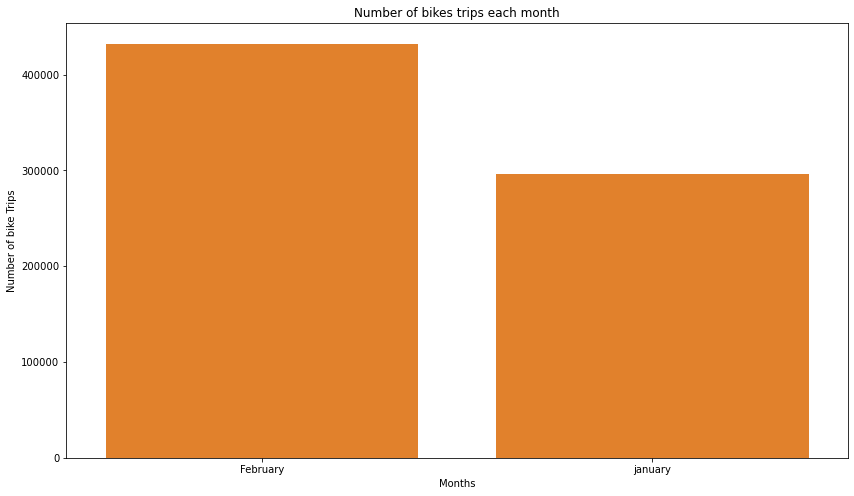

In [41]:
plt.figure(figsize=[14,8])

base_color = sb.color_palette()[1]
order_month = df2020['month'].value_counts().index
sb.countplot(data=df2020 , x='month', color= base_color , order= order_month)
plt.title('Number of bikes trips each month')
plt.xlabel('Months');
plt.ylabel('Number of bike Trips');

So must of the trips was in Feb

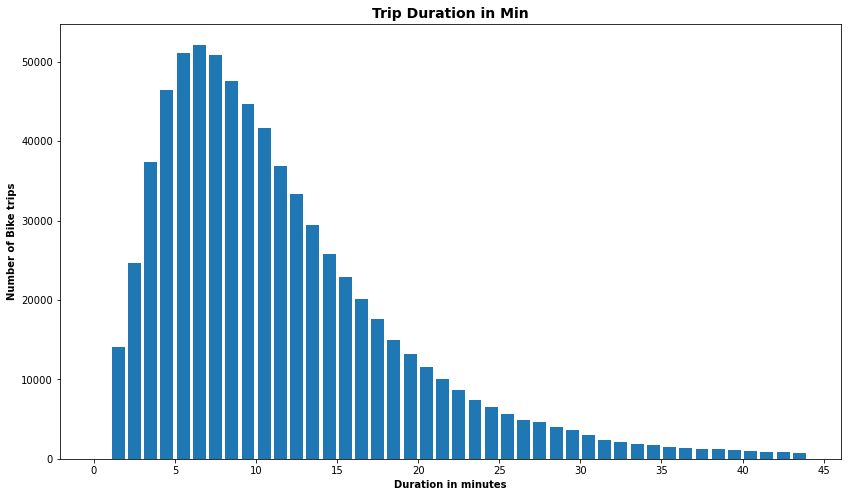

In [42]:
#duration of the rides

plt.figure(figsize=[14,8])
bin_edges = np.arange(0,45,1) # limit the shape
ticks = [0,5,10,15,20,25,30,35,40,45]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data=df2020,x='duration_minutes',bins=bin_edges,rwidth=0.8)
plt.title('Trip Duration in Min',y=1 , fontsize=14, fontweight='bold')
plt.xlabel('Duration in minutes',fontweight='bold')
plt.xticks(ticks,labels)
plt.ylabel('Number of Bike trips',fontweight='bold');

So the most duration is about 5 to 10 min

Most user type

In [43]:
df2020.user_type.value_counts()

Subscriber    448432
Customer      279774
Name: user_type, dtype: int64

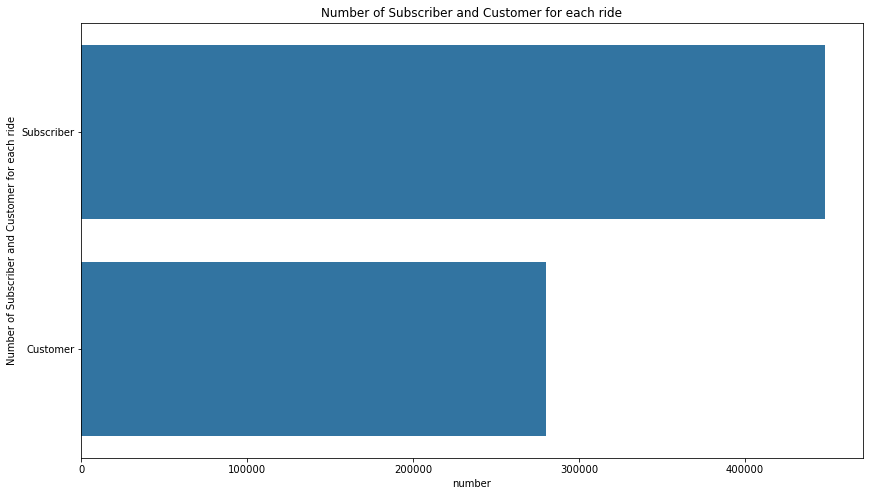

In [44]:
plt.figure(figsize=[14,8])
df2020.month.value_counts()

base_color = sb.color_palette()[0]
order_sub = df2020['user_type'].value_counts().index
sb.countplot(data=df2020 , y='user_type', color= base_color , order= order_sub)
plt.title('Number of Subscriber and Customer for each ride')
plt.xlabel('number');
plt.ylabel('Number of Subscriber and Customer for each ride');

there's a massive difference between the sub and the Cus

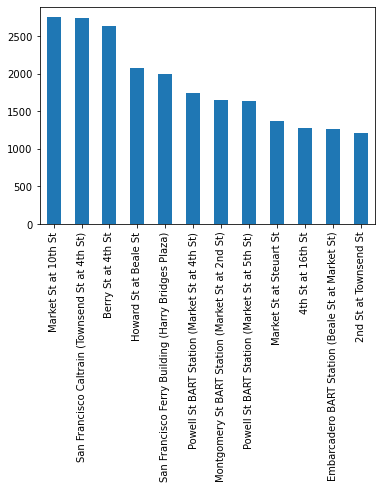

In [45]:
#  most 10 start station
df.start_station_name.value_counts(sort=True, ascending=False)[:12].plot(kind='bar');

the most 12 start station names with bikers

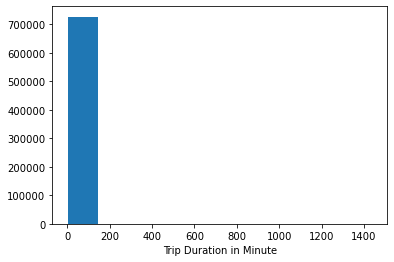

In [46]:
plt.hist(data=df2020, x='duration_minutes');
plt.xlabel('Trip Duration in Minute');

In [47]:
df2020['duration_minutes'].describe(percentiles=[.99])

count    728206.000000
mean         13.206060
std          23.102526
min           1.000000
50%           9.883333
99%          65.033333
max        1438.616667
Name: duration_minutes, dtype: float64

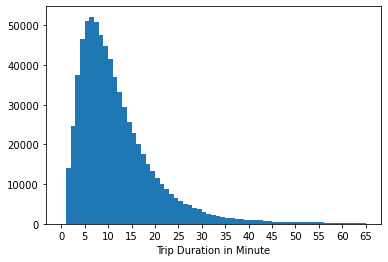

In [48]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df2020, x='duration_minutes', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

most of the trip duration is less than half hour

### 2. Bivariate Exploration

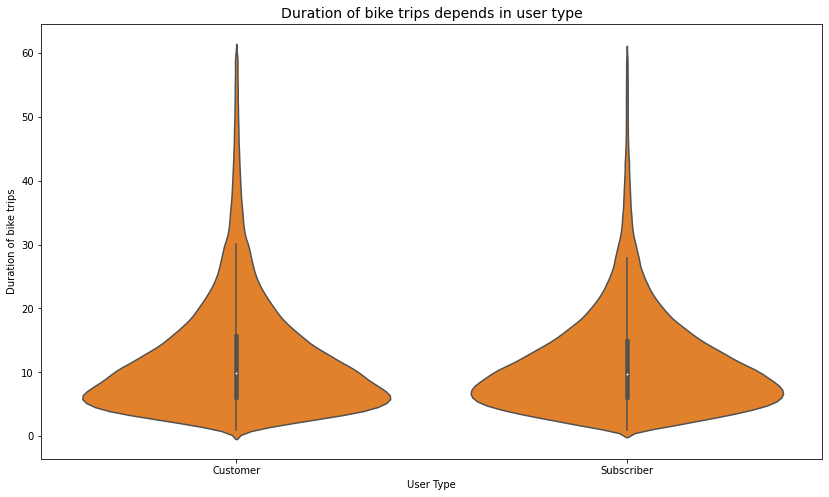

In [49]:
### is there a relation between user type and duration?

plt.figure(figsize=[14,8])
sb.violinplot(data=df2020.query('duration_minutes <= 60'),x='user_type',y='duration_minutes',color=sb.color_palette()[1])
plt.title('Duration of bike trips depends in user type',y=1,fontsize=14)
plt.xlabel('User Type')
plt.ylabel('Duration of bike trips');

it's seems there's no big difrence they have similar duration.

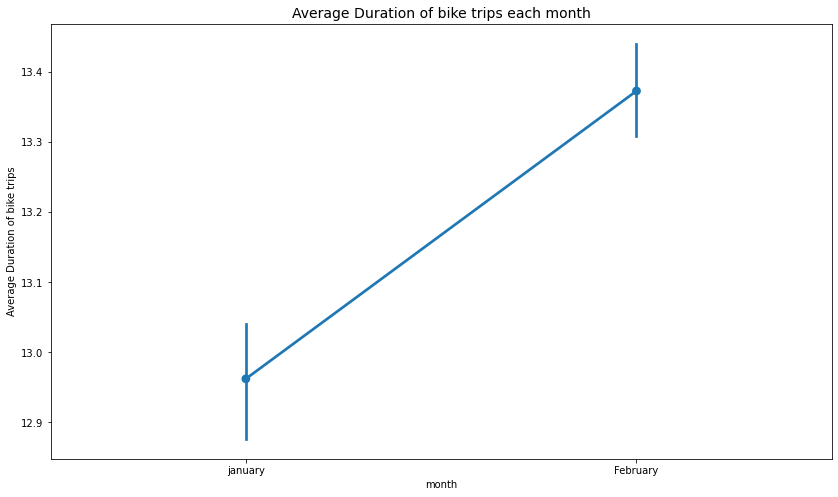

In [50]:
#duration againts month

plt.figure(figsize=[14,8])
base_color= sb.color_palette()[1]
sb.pointplot(data=df2020,x='month',y='duration_minutes')
plt.title('Average Duration of bike trips each month',y=1,fontsize=14)
plt.xlabel('month')
plt.ylabel('Average Duration of bike trips');

to be honest i notice something :
**the duration of bike trips is increasing by month so this mean it will decrease using of other rides such as ( car, but ...etc ) and that is a good thing**

Average Trip Duration on month

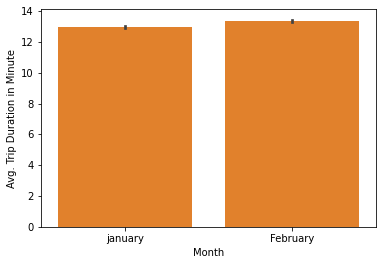

In [51]:
sb.barplot(data=df2020, x='month', y='duration_minutes', color=base_color);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

the trips duration is close to each other.

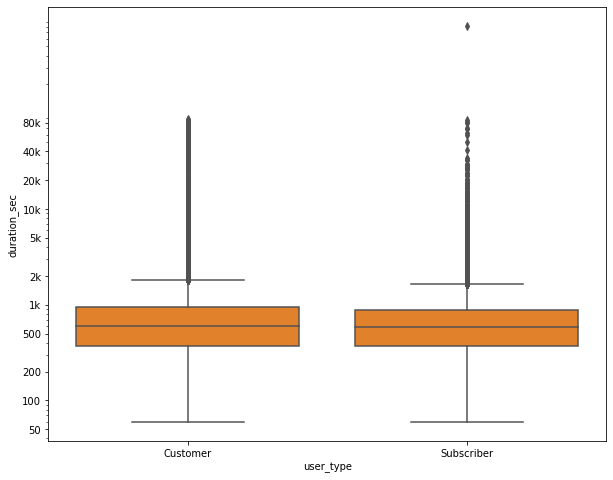

In [52]:
#relationship between   user_type and duarion using boxplot 
plt.figure(figsize=[10,8])
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

### 3. Multivariate Exploration

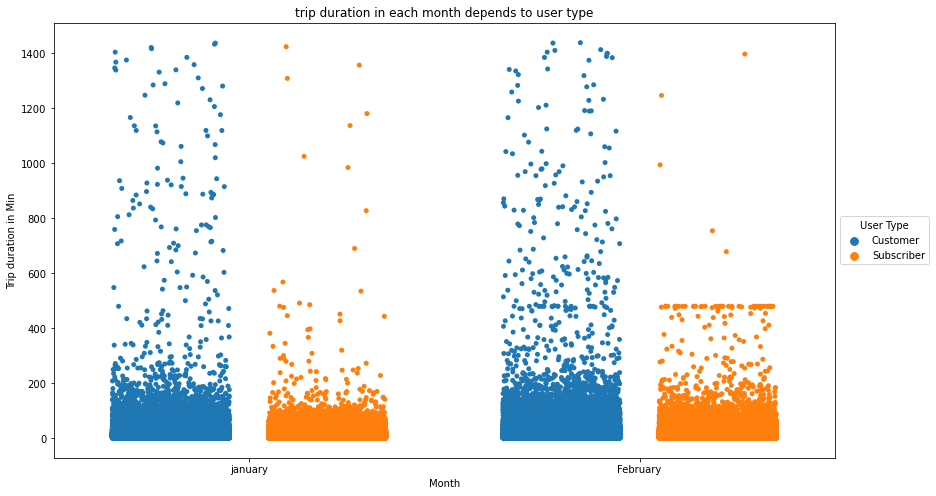

In [54]:
# duration and month by user type

plt.figure(figsize=[14,8])
sb.stripplot(data=df2020,x='month',y='duration_minutes',hue='user_type',jitter=0.30,dodge=True)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title = 'User Type');
plt.title('trip duration in each month depends to user type')
plt.xlabel('Month')
plt.ylabel('Trip duration in Min');

the plot show that somecustomer had longer trip duration 

How does the avg. trip duration between subscribers and customer per month ?

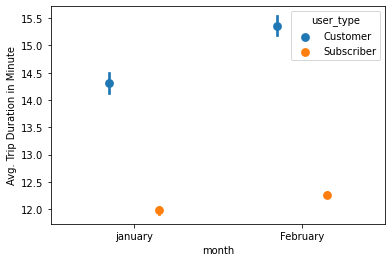

In [55]:

sb.pointplot(data=df2020, x='month', y='duration_minutes', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('month');
plt.ylabel('Avg. Trip Duration in Minute');

it can be seen from the above plot that subscriber ride trips much shorter or quiker than the one in the top ( Customer ). Both of them were increased in duration in February compare to the  duration in january. Lastly, subscriber is less duration than the Customer.

In [56]:
all_column = ['duration_sec','duration_minutes','start_time','end_time','start_station_id',
              'start_station_name','end_station_id','end_station_name','bike_id','user_type','rental_access_method','month']


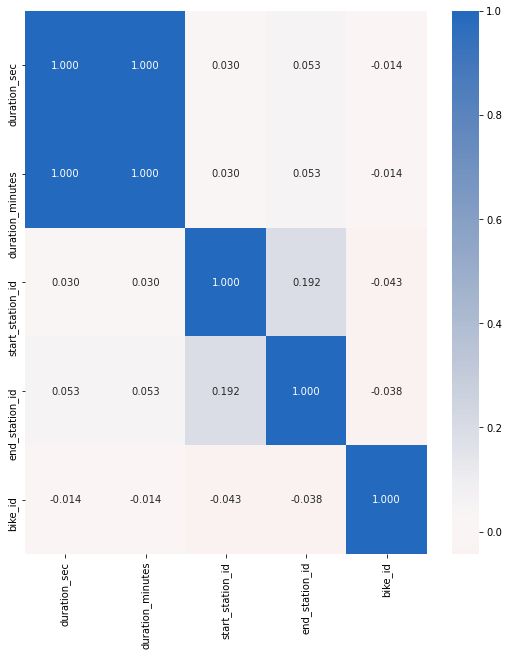

In [57]:
# the correlation plot
plt.figure(figsize = [9, 10])
sb.heatmap(df2020[all_column].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);


A value of exactly 1.0 means there is a perfect positive relationship between the two variables.So (duration_minutes,duration_sec) are perfect positive and who is under 0 is a negative relationship same as (bike_id,duration_sec) and for the negative relationship is above 0 same as (start_station_id, end_station_id) 

In [71]:
numeric = ['duration_sec','duration_minutes']

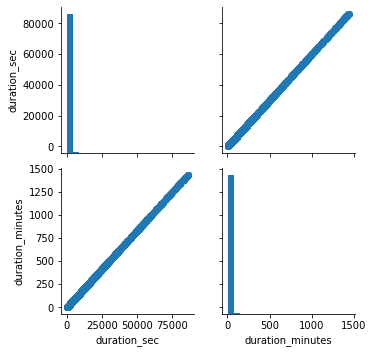

In [72]:
# scatterplot of all numeric variables

a = sb.PairGrid(data = df2020, vars = numeric);
a = a.map_diag(plt.hist, bins = 20);
a.map_offdiag(plt.scatter);


this 2 plot is showing the scarretplot for the duration minutes and sec
and it's a positive correlation